In [ ]:
# Import pandas and numpy libraries
import numpy as np
import pandas as pd

# Using encoding = "ISO-8859-1"
# Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.
rounds2 = pd.read_csv("G:\MLandAI\Assignment_1/rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("G:\MLandAI\Assignment_1/companies.txt", sep="\t", encoding = "ISO-8859-1")

In [ ]:
# Convert unique column values to lowercase and rename company_permalink column in rounds2 to permalink to ease merging
rounds2['permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [ ]:
#How many unique companies are present in rounds2?
len(rounds2['permalink'].unique())

66370

In [ ]:
#How many unique companies are present in companies?
len(companies['permalink'].unique())

66368

In [ ]:
# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
print("unique key for each company in companies data frame = permalink")

unique key for each company in companies data frame = permalink


In [ ]:
#Are there any companies in the rounds2 file which are not present in companies
rounds2_cp_lower_set = set(rounds2['permalink'])
companies_p_lower_set = set(companies['permalink'])
length = len(rounds2_cp_lower_set.difference(companies_p_lower_set )) # returns 7
if length >=0:
    print('Y')
else:
    print('N')

Y


In [ ]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
# Name the merged frame master_frame. 
# How many observations are present in master_frame?Though a col is added to rounds2 while merging we are merging on 'permalink'. 
# So this coloumn in companies will not be printed again in master frame
master_frame = pd.merge(rounds2, companies, how='inner', on = 'permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [ ]:
master_frame.shape

(114942, 16)

In [ ]:
print('Observations in master frame = 114942 entries')

Observations in master frame = 114942 entries


In [ ]:
# Added
print('Total investment across all funding types = ', master_frame.raised_amount_usd.sum())

Total investment across all funding types =  990123459550.0


In [ ]:
# Most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
# Set precision
pd.set_option('display.precision',38)

# Extract columns of interest from master_frame
funding_type = master_frame.loc[:,['funding_round_type','raised_amount_usd']]

# Extract rows with type seed, angel, venture and private_equity only and perform grouping
funding_type_segment = funding_type.loc[funding_type['funding_round_type'].isin(['seed','venture','angel','private_equity'])]
group_by_type = funding_type_segment.groupby('funding_round_type')

# Find most representative value for each investment type
pd.DataFrame(group_by_type.raised_amount_usd.mean().sort_values(ascending = False))

,raised_amount_usd
funding_round_type,
private_equity,"73,308,593.03"
venture,"11,748,949.13"
angel,"958,694.47"
seed,"719,779.62"


In [ ]:
print('private_equity = ', round(73308593.029442146420478820800781250000000,2))
print('venture = ', round(11748949.129489528015255928039550781250000,2))
print('angel = ', round(958694.469753086450509727001190185546875,2))
print('seed = ', round(719779.620201677782461047172546386718750,2))

private_equity =  73308593.03
venture =  11748949.13
angel =  958694.47
seed =  719779.62


In [ ]:
# Added
pd.DataFrame(group_by_type.raised_amount_usd.sum().sort_values(ascending = False))

,raised_amount_usd
funding_round_type,
venture,"590,126,216,876.00"
private_equity,"141,925,436,105.00"
seed,"16,988,238,596.00"
angel,"4,659,255,123.00"


In [ ]:
print('Total funding in 4 investement types = ', funding_type_segment.raised_amount_usd.sum())

Total funding in 4 investement types =  753699146700.0


In [ ]:
pd.DataFrame(group_by_type.raised_amount_usd.median().sort_values(ascending = False))

,raised_amount_usd
funding_round_type,
private_equity,"20,000,000.00"
venture,"5,000,000.00"
angel,"400,000.00"
seed,"275,000.00"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

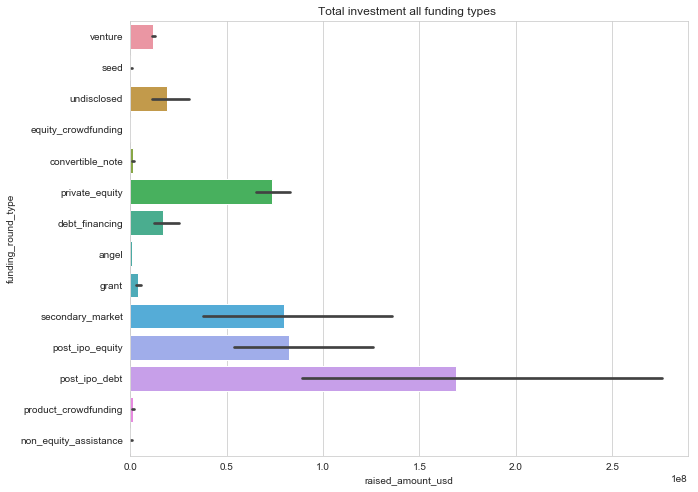

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=master_frame['raised_amount_usd'], y= "funding_round_type", data= master_frame)
plt.title("Total investment all funding types ")
plt.show()

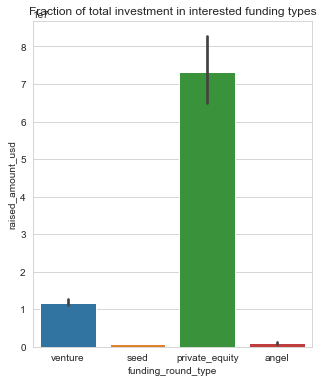

In [ ]:
plt.figure(figsize=(5, 6))
sns.barplot(y=master_frame['raised_amount_usd'], x= "funding_round_type", data= funding_type_segment)
plt.title("Fraction of total investment in interested funding types")
plt.show()

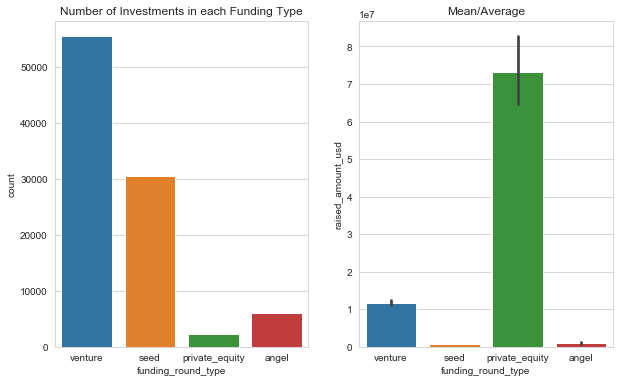

In [ ]:
# Chart 1: funding type (FT) is best suited for Spark Funds
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = "funding_round_type", data = funding_type_segment)
plt.title("Number of Investments in each Funding Type")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=funding_type_segment, estimator=np.mean)
plt.title("Mean/Average")
plt.show()

In [ ]:
#Detailed information on master frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 19.9+ MB


In [ ]:
#Check the number of null entries in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [ ]:
# Percentage wise missing data
pd.set_option('display.precision',5)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [ ]:
#Removing the unwanted columns. These do not contribute much to analysis asked for, 73%, 18%
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
# percentage wise missing values once we drop unwanted columns 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
category_list              2.96
status                     0.00
country_code               7.54
dtype: float64

In [ ]:
# Brounght up
# Rows with NaN values in raised amount usd coloumn do not contribute to analysis. So we delete them
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [ ]:
#Changed name here
# To see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type
#To find countries with highest USD raised in venture type investment. Only top 9 are displayed
# These countries are choosen to construct dataframe top9
pd.set_option('display.precision',40)
master_frame= master_frame.loc[master_frame['funding_round_type'].isin(['venture'])]
master_frame_bycode = master_frame.groupby('country_code')
top9_investment_based = pd.DataFrame(master_frame_bycode['raised_amount_usd'].sum().sort_values(ascending = False).head(9))
top9_investment_based

,raised_amount_usd
country_code,
USA,"422,510,842,796.00"
CHN,"39,835,418,773.00"
GBR,"20,245,627,416.00"
IND,"14,391,858,718.00"
CAN,"9,583,332,317.00"
FRA,"7,259,536,732.00"
ISR,"6,907,514,579.00"
DEU,"6,346,959,822.00"
JPN,"3,363,676,611.00"


In [ ]:
#Brought up
# Extract primary sector from category list. New column primary_sector is added at the end
master_frame['primary_sector'] = master_frame['category_list'].str.split("|", n=1,expand= True)[0]
#  For computation ease convert all primary_sector names to lower
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,apps
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,curated web
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics


In [ ]:
#Changed name here
#For the chosen investment type, make a data frame named top9 with the top nine countries 
#(based on the total investment amount each country has received)
top9= master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,curated web
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps
28,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,education
34,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,Curated Web,acquired,USA,curated web
38,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940.00",/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,curated web


In [ ]:
master_frame.shape

(50228, 10)

In [ ]:
# After selecting only top 9 countries with highest investement
top9.shape

(44383, 10)

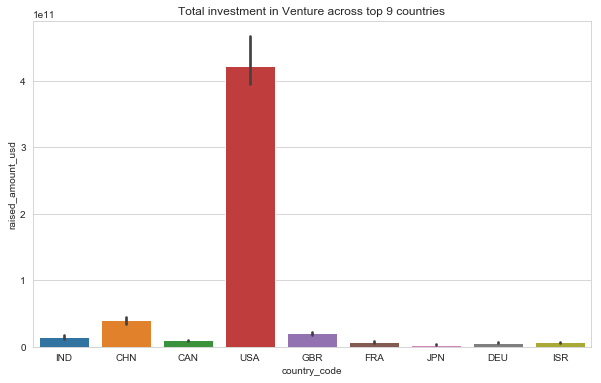

In [ ]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
plt.figure(figsize=(10, 6))
sns.barplot(y='raised_amount_usd', x= "country_code", data= top9, estimator = sum)
plt.title("Total investment in Venture across top 9 countries")
plt.show()

In [ ]:
# Choose top 3 english speaking countries form top9 data frame
countries = top9[['country_code', 'raised_amount_usd']]
top3_eng = countries.groupby('country_code')
top3_eng['raised_amount_usd'].sum().sort_values(ascending = False)

country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
Name: raised_amount_usd, dtype: float64

In [ ]:
# Top 3 english speaking countries - USA, GBR, IND (from top9), China in non-english

In [ ]:
# Series is 1D array. so we can counter to count frequency of occurence of individual elements from array. Based on count only
from collections import Counter
countries = top9['country_code']
eng_speaking_countries_fromtop9 = countries.sort_values(ascending = False)
Counter(eng_speaking_countries_fromtop9) #Gives Dictionary 

Counter({'USA': 36139,
         'JPN': 274,
         'ISR': 796,
         'IND': 824,
         'GBR': 2055,
         'FRA': 917,
         'DEU': 558,
         'CHN': 1564,
         'CAN': 1256})

In [ ]:
# Rows with NaN values in raised amount usd coloumn do not contribute to analysis. So we delete them
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [ ]:
# Missing data report post row deletion percentage wise
pd.set_option('display.precision',2)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.00
status                    0.00
country_code              4.21
primary_sector            1.00
dtype: float64

In [ ]:
#Check : Dropped 7 out of 16 columns and then dropped raised usd rows with null values: 114942 - 19984 = 94958
# out of 94958 rows only rows with venture type investment are taken from master_frame. Therefore 50228
master_frame.shape 

(50228, 10)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
master_frame['raised_amount_usd'].describe()

count           50,228.00
mean        11,748,949.13
std         86,352,066.56
min                  0.00
25%          1,600,901.75
50%          5,000,000.00
75%         12,000,000.00
max     17,600,000,000.00
Name: raised_amount_usd, dtype: float64

In [ ]:
# Fill NaN vaues in country code with unknown
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = "notspecified"
# Fill NaN vaues in category list with unknown
# Drop these rows will also drop rows with raised_usd. So retained
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "notspecified"
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
primary_sector            1.00
dtype: float64

In [ ]:
mapping = pd.read_csv("G:\MLandAI\Assignment_1/mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [ ]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [ ]:
# Unique primary_sectors in mapping
len(mapping['category_list'].str.lower().unique())

688

In [ ]:
# Maps from the excel category list to main sector to value 
# Converts from row wise mapping to column eise mapping in an order of main_sectoe in excel sheet or df
mapping_new = pd.melt(mapping,id_vars= 'category_list', var_name = 'main_sector')
# There are 688 unique categories. Each is compared with all 9 categories to get the value 0 or 1
# 688 * 9 = 6192 entries in mapping upon melt. Take off rows with values 0  
mapping_new = mapping_new[mapping_new.value != 0]
mapping_new.head()
# This maps category list or primary sector to 9 main_sectors including blanks. We have changed the mapping dataframe from 688x10 to 688x3

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [ ]:
#category list in mapping_new is same as primary sector in master frame 
mapping_new.rename(columns={'category_list':'primary_sector'}, inplace = True)

In [ ]:
# merged data frame with each primary sector mapped to its main sector 
# New dataframe for mapping
mapping_new = mapping_new.drop('value', axis=1)
# To merge mapping and master frame convert primary sector to lower
mapping_new['primary_sector'] = mapping_new['primary_sector'].str.lower()
mapping_new.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [ ]:
mapping_new['main_sector'].str.lower().unique()

array(['automotive & sports', 'blanks', 'cleantech / semiconductors',
       'entertainment', 'health', 'manufacturing',
       'news, search and messaging', 'others',
       'social, finance, analytics, advertising'], dtype=object)

In [ ]:
mapping_new[mapping_new.main_sector == 'Blanks']

,primary_sector,main_sector
688,NaN,Blanks


In [ ]:
mapping_new= mapping_new[mapping_new.main_sector != 'Blanks']
mapping_new.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [ ]:
mapping_new['main_sector'].str.lower().unique()

array(['automotive & sports', 'cleantech / semiconductors',
       'entertainment', 'health', 'manufacturing',
       'news, search and messaging', 'others',
       'social, finance, analytics, advertising'], dtype=object)

In [ ]:
len(mapping_new['main_sector'].str.lower().unique())

8

In [ ]:
#Final merged data frame with primary sector mapped to 8 main sectors 
mapping_new.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [ ]:
mapping_new.shape

(687, 2)

In [ ]:
mapping_new.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

In [ ]:
# the na is represented by 0. We need to fix this else rows are lot in merging later
import re
mapping_new['primary_sector'] = mapping_new.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))
mapping_new.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [ ]:
# Extract only top 3 english speaking countries from top9 dataframe because it is investment based
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps


In [ ]:
top3_english.shape

(39018, 10)

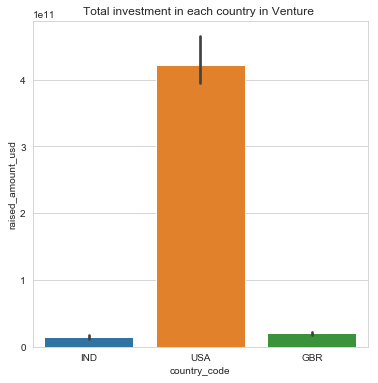

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(y='raised_amount_usd', x= "country_code", data= top3_english, estimator = sum)
plt.title("Total investment in each country in Venture ")
plt.show()

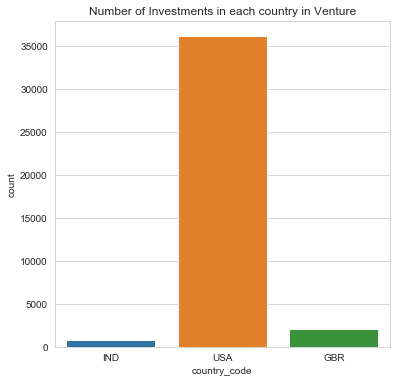

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "country_code", data = top3_english)
plt.title("Number of Investments in each country in Venture")
plt.show()

In [ ]:
mapping_new.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [ ]:
# data frame with each company’s main sector (main_sector) mapped to it = mapping_new_eight df
# top three English speaking countries and the most suitable funding type for Spark Funds = top3_english df
# Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.
#the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).
# use indicator to easily filter rows 
# concentrating on master frame used inner join
top3_eng_ven = pd.merge(top3_english, mapping_new, how='inner', on='primary_sector', indicator=True)

In [ ]:
top3_eng_ven.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,both
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,"5,800,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,both
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,"18,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,both
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment,both


In [ ]:
top3_eng_ven.shape

(38788, 12)

In [ ]:
# Upon correcting primary sector names merge again
#top3_eng_ven = pd.merge(top3_english, mapping_new_eight, how='inner', on='primary_sector', indicator=True)
#top3_eng_ven.head()
top3_eng_ven =top3_eng_ven[top3_eng_ven['_merge'] == 'both']
top3_eng_ven = top3_eng_ven.drop('_merge', axis=1)
top3_eng_ven.head()

# Removing all rows with null values in main_sector
# master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
# df = df[~np.isnan(df['Landsize'])]
# top3_eng_ven = top3_eng_ven[~np.isnan(top3_eng_ven['main_sector'])]
#top3_eng_ven = top3_eng_ven[top3_eng_ven['_merge'] == 'both']
#top3_eng_ven = top3_eng_ven.drop('_merge', axis=1)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,"5,800,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,"18,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment


In [ ]:
#Dropped merge column 
top3_eng_ven.shape

(38788, 11)

In [ ]:
top3_eng_ven.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 11 columns):
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [ ]:
# Criteria 1: top3_eng_ven has all 3 eng speaking conutries with primary sectors mapped to corresponding main sectors
# Criteria2: only 5 to 15 million USD investment 
# select the countries with raised usd between 5 to 15 million usd
top3_eng_ven = top3_eng_ven.loc[(top3_eng_ven.raised_amount_usd >=5000000) & (top3_eng_ven.raised_amount_usd <=15000000)]
#top3_eng_ven = top3_eng_ven.drop(top3_eng_ven[(top3_eng_ven.raised_amount_usd < 5000000)].index)
#top3_eng_ven = top3_eng_ven.drop(top3_eng_ven[(top3_eng_ven.raised_amount_usd > 15000000)].index)
top3_eng_ven.shape

(13012, 11)

In [ ]:
# Create three separate data frames D1, D2 and D3 for each of the three countries 
D1 = top3_eng_ven[top3_eng_ven['country_code'] == 'USA']
D1.describe()

,raised_amount_usd
count,"12,063.00"
mean,"8,932,860.59"
std,"3,075,861.23"
min,"5,000,000.00"
25%,"6,000,970.50"
50%,"8,300,000.00"
75%,"11,000,000.00"
max,"15,000,000.00"


In [ ]:
D2 = top3_eng_ven[top3_eng_ven['country_code'] == 'GBR']
D2.describe()

,raised_amount_usd
count,621.00
mean,"8,661,962.47"
std,"2,867,166.77"
min,"5,000,000.00"
25%,"6,084,330.00"
50%,"8,000,000.00"
75%,"10,606,760.00"
max,"15,000,000.00"


In [ ]:
D3 = top3_eng_ven[top3_eng_ven['country_code'] == 'IND']
D3.describe()

,raised_amount_usd
count,328.00
mean,"8,992,510.98"
std,"3,219,811.35"
min,"5,000,000.00"
25%,"6,000,000.00"
50%,"8,700,000.00"
75%,"10,555,000.00"
max,"15,000,000.00"


In [ ]:
#1. D1 - Total number of Investments (count) = count
#2.  D1 - Total amount of investment (USD)
print('Total USD = ', D1['raised_amount_usd'].sum())
#3,4,5. D1 - Top Sector name (based total investment)
sec_seg = D1.groupby('main_sector')
sec_seg['raised_amount_usd'].sum().sort_values(ascending = False)

Total USD =  107757097294.0


main_sector
Others                                    26,321,007,002.00
Social, Finance, Analytics, Advertising   23,807,376,964.00
Cleantech / Semiconductors                21,633,430,822.00
News, Search and Messaging                13,971,567,428.00
Health                                     8,211,859,357.00
Manufacturing                              7,258,553,378.00
Entertainment                              5,099,197,982.00
Automotive & Sports                        1,454,104,361.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#.6,7,8. D1 - Number of investments in 1st, 2nd and 3rd sector 
sec_seg = D1.groupby('main_sector')
sec_seg['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [ ]:
#9.  For point 3 (top sector count-wise), which company received the highest investment?
D1_others = D1[D1.main_sector == "Others" ]
D1_others_comp = D1_others.groupby('name')
D1_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
Virtustream           64,300,000.00
Capella Photonics     54,968,051.00
AirTight Networks     54,201,907.00
deCarta               52,100,000.00
Black Duck Software   51,000,000.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#10. For point 4 (second best sector count-wise), which company received the highest investment?
D1_others = D1[D1.main_sector == "Social, Finance, Analytics, Advertising" ]
D1_others_comp = D1_others.groupby('name')
D1_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
SST Inc. (Formerly ShotSpotter)   67,933,006.00
Demandbase                        63,000,000.00
Intacct                           61,800,000.00
NetBase Solutions                 60,600,000.00
Lotame                            59,700,000.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#1. D2 - Total number of Investments (count) = count
#2.  D2 - Total amount of investment (USD)
print('Total USD = ', D2['raised_amount_usd'].sum())
#3,4,5. D2 - Top Sector name (based total investment)
sec_seg = D2.groupby('main_sector')
sec_seg['raised_amount_usd'].sum().sort_values(ascending = False)

Total USD =  5379078691.0


main_sector
Others                                    1,283,624,289.00
Cleantech / Semiconductors                1,163,990,056.00
Social, Finance, Analytics, Advertising   1,089,404,014.00
News, Search and Messaging                  615,746,235.00
Entertainment                               482,784,687.00
Manufacturing                               361,940,335.00
Health                                      214,537,510.00
Automotive & Sports                         167,051,565.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#.6,7,8. D2 - Number of investments in 1st, 2nd and 3rd sector 
sec_seg = D2.groupby('main_sector')
sec_seg['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [ ]:
#9.  For point 3 (top sector count-wise), which company received the highest investment?
D2_others = D2[D2.main_sector == "Others" ]
D2_others_comp = D2_others.groupby('name')
D2_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
Electric Cloud            37,000,000.00
SenSage                   36,250,000.00
Enigmatec                 32,500,000.00
SilverRail Technologies   29,000,000.00
OpenCloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#10. For point 4 (second best sector count-wise), which company received the highest investment?
D2_others = D2[D2.main_sector == "Social, Finance, Analytics, Advertising" ]
D2_others_comp = D2_others.groupby('name')
D2_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
Celltick Technologies   37,500,000.00
myThings                34,000,000.00
Zopa                    32,900,000.00
VisualDNA               28,550,000.00
MarketInvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#1. D3 - Total number of Investments (count) = count
#2.  D3 - Total amount of investment (USD)
print('Total USD = ', D3['raised_amount_usd'].sum())
#3,4,5. D3 - Top Sector name (based total investment)
sec_seg = D3.groupby('main_sector')
sec_seg['raised_amount_usd'].sum().sort_values(ascending = False)

Total USD =  2949543602.0


main_sector
Others                                    1,013,409,507.00
Social, Finance, Analytics, Advertising     550,549,550.00
News, Search and Messaging                  433,834,545.00
Entertainment                               280,830,000.00
Manufacturing                               200,900,000.00
Health                                      167,740,000.00
Cleantech / Semiconductors                  165,380,000.00
Automotive & Sports                         136,900,000.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#.6,7,8. D3 - Number of investments in 1st, 2nd and 3rd sector 
sec_seg = D3.groupby('main_sector')
sec_seg['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [ ]:
#9.  For point 3 (top sector count-wise), which company received the highest investment?
D3_others = D3[D3.main_sector == "Others" ]
D3_others_comp = D3_others.groupby('name')
D3_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
FirstCry.com        39,000,000.00
Myntra              38,000,000.00
CommonFloor         32,900,000.00
Pepperfry.com       28,000,000.00
ItzCash Card Ltd.   25,000,000.00
Name: raised_amount_usd, dtype: float64

In [ ]:
#10. For point 4 (second best sector count-wise), which company received the highest investment?
D3_others = D3[D3.main_sector == "Social, Finance, Analytics, Advertising" ]
D3_others_comp = D3_others.groupby('name')
D3_others_comp.raised_amount_usd.sum().sort_values(ascending = False).head()

name
Manthan Systems              50,700,000.00
Komli Media                  28,000,000.00
ShopClues.com                25,000,000.00
inTarvo                      21,900,000.00
Grameen Financial Services   21,556,050.00
Name: raised_amount_usd, dtype: float64

In [ ]:
D1_count = pd.DataFrame(D1.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False))
D1_count 

,raised_amount_usd
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350
"News, Search and Messaging",1583
Health,909
Manufacturing,799
Entertainment,591
Automotive & Sports,167


In [ ]:
D1_sum = pd.DataFrame(D1.groupby('main_sector').raised_amount_usd.sum().sort_values(ascending = False))
D1_sum

,raised_amount_usd
main_sector,
Others,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising","23,807,376,964.00"
Cleantech / Semiconductors,"21,633,430,822.00"
"News, Search and Messaging","13,971,567,428.00"
Health,"8,211,859,357.00"
Manufacturing,"7,258,553,378.00"
Entertainment,"5,099,197,982.00"
Automotive & Sports,"1,454,104,361.00"


In [ ]:
D1_count_sum = pd.merge(D1_count, D1_sum, how = "inner" , on = 'main_sector')
D1_count_sum

,raised_amount_usd_x,raised_amount_usd_y
main_sector,,
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"
Cleantech / Semiconductors,2350,"21,633,430,822.00"
"News, Search and Messaging",1583,"13,971,567,428.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
Entertainment,591,"5,099,197,982.00"
Automotive & Sports,167,"1,454,104,361.00"


In [ ]:
D1_count_sum.rename(columns = {'raised_amount_usd_x':'count','raised_amount_usd_y':'sum'}, inplace = True)
D1_count_sum

,count,sum
main_sector,,
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"
Cleantech / Semiconductors,2350,"21,633,430,822.00"
"News, Search and Messaging",1583,"13,971,567,428.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
Entertainment,591,"5,099,197,982.00"
Automotive & Sports,167,"1,454,104,361.00"


In [ ]:
# Before adding count and sum columns
D1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment
14,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,"5,000,000.00",/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,"10,000,000.00",/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment


In [ ]:
# Before adding count and sum columns
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063 entries, 4 to 38781
Data columns (total 11 columns):
funding_round_permalink    12063 non-null object
funding_round_type         12063 non-null object
funded_at                  12063 non-null object
raised_amount_usd          12063 non-null float64
permalink                  12063 non-null object
name                       12063 non-null object
category_list              12063 non-null object
status                     12063 non-null object
country_code               12063 non-null object
primary_sector             12063 non-null object
main_sector                12063 non-null object
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
# After adding sum and count columns
# Final D1 data frame with all columns from master frame and cum and count columns
D1 = pd.merge(D1, D1_count_sum, how ='inner', on = 'main_sector')
D1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment,591,"5,099,197,982.00"
1,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,"5,000,000.00",/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment,591,"5,099,197,982.00"
2,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment,591,"5,099,197,982.00"
3,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment,591,"5,099,197,982.00"
4,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,"10,000,000.00",/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment,591,"5,099,197,982.00"


In [ ]:
# After adding sum and count columns
# Rows are not lost cols are added against main_sector
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12063 entries, 0 to 12062
Data columns (total 13 columns):
funding_round_permalink    12063 non-null object
funding_round_type         12063 non-null object
funded_at                  12063 non-null object
raised_amount_usd          12063 non-null float64
permalink                  12063 non-null object
name                       12063 non-null object
category_list              12063 non-null object
status                     12063 non-null object
country_code               12063 non-null object
primary_sector             12063 non-null object
main_sector                12063 non-null object
count                      12063 non-null int64
sum                        12063 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.3+ MB


In [ ]:
D2_count = pd.DataFrame(D2.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False))
D2_count 

,raised_amount_usd
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130
"News, Search and Messaging",73
Entertainment,56
Manufacturing,42
Health,24
Automotive & Sports,16


In [ ]:
D2_sum = pd.DataFrame(D2.groupby('main_sector').raised_amount_usd.sum().sort_values(ascending = False))
D2_sum

,raised_amount_usd
main_sector,
Others,"1,283,624,289.00"
Cleantech / Semiconductors,"1,163,990,056.00"
"Social, Finance, Analytics, Advertising","1,089,404,014.00"
"News, Search and Messaging","615,746,235.00"
Entertainment,"482,784,687.00"
Manufacturing,"361,940,335.00"
Health,"214,537,510.00"
Automotive & Sports,"167,051,565.00"


In [ ]:
D2_count_sum = pd.merge(D2_count, D2_sum, how = "inner" , on = 'main_sector')
D2_count_sum

,raised_amount_usd_x,raised_amount_usd_y
main_sector,,
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"
Cleantech / Semiconductors,130,"1,163,990,056.00"
"News, Search and Messaging",73,"615,746,235.00"
Entertainment,56,"482,784,687.00"
Manufacturing,42,"361,940,335.00"
Health,24,"214,537,510.00"
Automotive & Sports,16,"167,051,565.00"


In [ ]:
D2_count_sum.rename(columns = {'raised_amount_usd_x':'count','raised_amount_usd_y':'sum'}, inplace = True)
D2_count_sum

,count,sum
main_sector,,
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"
Cleantech / Semiconductors,130,"1,163,990,056.00"
"News, Search and Messaging",73,"615,746,235.00"
Entertainment,56,"482,784,687.00"
Manufacturing,42,"361,940,335.00"
Health,24,"214,537,510.00"
Automotive & Sports,16,"167,051,565.00"


In [ ]:
# Final D1 data frame with all columns from master frame and cum and count columns
# After adding sum and count columns
D2 = pd.merge(D2, D2_count_sum, how ='inner', on = 'main_sector')
D2.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,56,"482,784,687.00"
1,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,"5,800,000.00",/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment,56,"482,784,687.00"
2,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,13-05-2010,"8,800,000.00",/organization/eutechnyx,Eutechnyx,Games,operating,GBR,games,Entertainment,56,"482,784,687.00"
3,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,01-06-2011,"10,000,000.00",/organization/mind-candy,Mind Candy,Games,operating,GBR,games,Entertainment,56,"482,784,687.00"
4,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,23-11-2006,"10,860,000.00",/organization/mind-candy,Mind Candy,Games,operating,GBR,games,Entertainment,56,"482,784,687.00"


In [ ]:
# After adding sum and count columns
# Rows are not lost cols are added against main_sector
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 620
Data columns (total 13 columns):
funding_round_permalink    621 non-null object
funding_round_type         621 non-null object
funded_at                  621 non-null object
raised_amount_usd          621 non-null float64
permalink                  621 non-null object
name                       621 non-null object
category_list              621 non-null object
status                     621 non-null object
country_code               621 non-null object
primary_sector             621 non-null object
main_sector                621 non-null object
count                      621 non-null int64
sum                        621 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 67.9+ KB


In [ ]:
D3_count = pd.DataFrame(D3.groupby('main_sector').raised_amount_usd.count().sort_values(ascending = False))
D3_count 

,raised_amount_usd
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52
Entertainment,33
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13


In [ ]:
D3_sum = pd.DataFrame(D3.groupby('main_sector').raised_amount_usd.sum().sort_values(ascending = False))
D3_sum

,raised_amount_usd
main_sector,
Others,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising","550,549,550.00"
"News, Search and Messaging","433,834,545.00"
Entertainment,"280,830,000.00"
Manufacturing,"200,900,000.00"
Health,"167,740,000.00"
Cleantech / Semiconductors,"165,380,000.00"
Automotive & Sports,"136,900,000.00"


In [ ]:
D3_count_sum = pd.merge(D3_count, D3_sum, how = "inner" , on = 'main_sector')
D3_count_sum

,raised_amount_usd_x,raised_amount_usd_y
main_sector,,
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"
"News, Search and Messaging",52,"433,834,545.00"
Entertainment,33,"280,830,000.00"
Manufacturing,21,"200,900,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Health,19,"167,740,000.00"
Automotive & Sports,13,"136,900,000.00"


In [ ]:
D3_count_sum.rename(columns = {'raised_amount_usd_x':'count','raised_amount_usd_y':'sum'}, inplace = True)
D3_count_sum

,count,sum
main_sector,,
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"
"News, Search and Messaging",52,"433,834,545.00"
Entertainment,33,"280,830,000.00"
Manufacturing,21,"200,900,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Health,19,"167,740,000.00"
Automotive & Sports,13,"136,900,000.00"


In [ ]:
# After adding sum and count columns
D3 = pd.merge(D3, D3_count_sum, how ='inner', on = 'main_sector')
D3.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,count,sum
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,33,"280,830,000.00"
1,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,"5,000,000.00",/organization/dhruva,Dhruva,Games,operating,IND,games,Entertainment,33,"280,830,000.00"
2,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,"5,000,000.00",/organization/games2win,Games2Win,Games,operating,IND,games,Entertainment,33,"280,830,000.00"
3,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,"6,000,000.00",/organization/games2win,Games2Win,Games,operating,IND,games,Entertainment,33,"280,830,000.00"
4,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,"5,000,000.00",/organization/pokkt,POKKT,Games,operating,IND,games,Entertainment,33,"280,830,000.00"


In [ ]:
# After adding sum and count columns
# Rows are not lost cols are added against main_sector
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 13 columns):
funding_round_permalink    328 non-null object
funding_round_type         328 non-null object
funded_at                  328 non-null object
raised_amount_usd          328 non-null float64
permalink                  328 non-null object
name                       328 non-null object
category_list              328 non-null object
status                     328 non-null object
country_code               328 non-null object
primary_sector             328 non-null object
main_sector                328 non-null object
count                      328 non-null int64
sum                        328 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 35.9+ KB


In [ ]:
D1.shape

(12063, 13)

In [ ]:
D2.shape

(621, 13)

In [ ]:
D3.shape

(328, 13)

In [ ]:
D1_top3_mainsec = D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D1_top3_mainsec.shape

(8014, 13)

In [ ]:
D2_top3_mainsec = D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2_top3_mainsec.shape

(410, 13)

In [ ]:
D3_top3_mainsec = D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
D3_top3_mainsec.shape

(222, 13)

In [ ]:
# D1_D2 = pd.merge(D1_top3_mainsec, D2_top3_mainsec, how='inner', on='main_sector')
# D1_D2_D3 = pd.merge(D1_D2, D3_top3_mainsec, how='inner', on='main_sector')
# Same number of columns
D1_D2 = pd.concat([D1_top3_mainsec, D2_top3_mainsec], axis = 0)
D1_D2_D3 = pd.concat([D1_D2, D3_top3_mainsec], axis = 0)
D1_D2_D3.shape

(8646, 13)

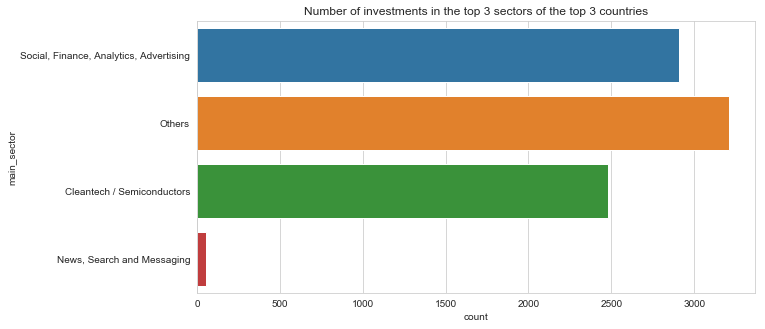

In [ ]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
plt.figure(figsize=(10, 5))
# sns.countplot(x = "country_code", data = top3_english)
sns.countplot(y = "main_sector", data=D1_D2_D3)
plt.title("Number of investments in the top 3 sectors of the top 3 countries")
plt.show()

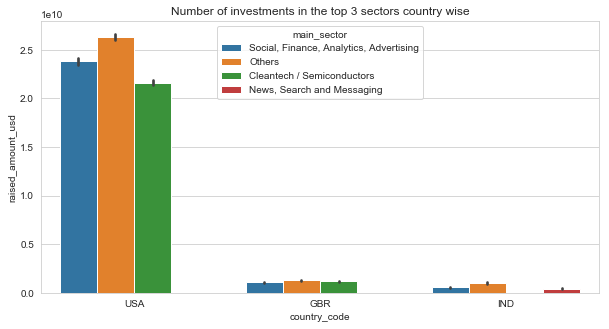

In [ ]:
plt.figure(figsize=(10, 5))
# sns.countplot(x = "country_code", data = top3_english)
sns.barplot(hue = "main_sector", x='country_code', y= 'raised_amount_usd', data=D1_D2_D3, estimator = sum)
plt.title("Number of investments in the top 3 sectors country wise")
plt.show()